In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st

In [2]:
sales=pd.read_csv('/content/drive/MyDrive/Data Science/supermarket_sales - Sheet1.csv')
sales

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
sales.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [4]:
df=pd.DataFrame({'Branch':sales['Branch'],'Gender':sales['Gender'],'Product':sales['Product line'],'Total':sales['Total'],'Payment':sales['Payment'],})
df['Customer type']=sales['Customer type']
df

,Branch,Gender,Product,Total,Payment,Customer type
0,A,Female,Health and beauty,548.9715,Ewallet,Member
1,C,Female,Electronic accessories,80.2200,Cash,Normal
2,A,Male,Home and lifestyle,340.5255,Credit card,Normal
3,A,Male,Health and beauty,489.0480,Ewallet,Member
4,A,Male,Sports and travel,634.3785,Ewallet,Normal
...,...,...,...,...,...,...
995,C,Male,Health and beauty,42.3675,Ewallet,Normal
996,B,Female,Home and lifestyle,1022.4900,Ewallet,Normal
997,A,Male,Food and beverages,33.4320,Cash,Member
998,A,Male,Home and lifestyle,69.1110,Cash,Normal


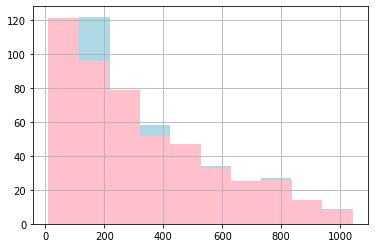

In [35]:
members=df.loc[df['Customer type']=='Member']
memberstot=members['Total']
normal=df.loc[df['Customer type']=='Normal']
normaltot=normal['Total']
normaltot.hist(color='lightblue')
memberstot.hist(color='pink')

# Hypotheisis



## H0: Members and Normal Cutomers Avg total are same.

##H1: Normal Customers average total is less than members.


In [5]:
df.groupby('Customer type').mean()

,Total
Customer type,
Member,327.791305
Normal,318.122856


In [6]:
means=df.groupby('Customer type').mean()

In [38]:
difference=means['Total'][0]-means['Total'][1]
observed_difference=difference
observed_difference

9.668449677798662

Generating Random permutations

In [8]:
df.iloc[123]

Branch                            C
Gender                         Male
Product          Home and lifestyle
Total                       536.844
Payment                 Credit card
Customer type                Member
Name: 123, dtype: object

In [9]:
randomsamples=df.sample(1000,replace=False)
randomsamples

,Branch,Gender,Product,Total,Payment,Customer type
926,B,Male,Sports and travel,92.7255,Credit card,Member
398,B,Female,Health and beauty,258.6780,Credit card,Member
271,C,Female,Health and beauty,44.3520,Cash,Member
357,C,Female,Sports and travel,1002.1200,Cash,Normal
969,B,Female,Electronic accessories,181.0725,Credit card,Member
...,...,...,...,...,...,...
946,C,Male,Electronic accessories,176.9250,Credit card,Member
792,B,Female,Home and lifestyle,1022.3850,Credit card,Normal
943,A,Male,Health and beauty,266.6475,Credit card,Normal
606,A,Female,Fashion accessories,394.3275,Ewallet,Member


In [10]:
randomsamples['Total']

926      92.7255
398     258.6780
271      44.3520
357    1002.1200
969     181.0725
         ...    
946     176.9250
792    1022.3850
943     266.6475
606     394.3275
172     175.1400
Name: Total, Length: 1000, dtype: float64

In [11]:
original_shuffled=df.copy()
original_shuffled

,Branch,Gender,Product,Total,Payment,Customer type
0,A,Female,Health and beauty,548.9715,Ewallet,Member
1,C,Female,Electronic accessories,80.2200,Cash,Normal
2,A,Male,Home and lifestyle,340.5255,Credit card,Normal
3,A,Male,Health and beauty,489.0480,Ewallet,Member
4,A,Male,Sports and travel,634.3785,Ewallet,Normal
...,...,...,...,...,...,...
995,C,Male,Health and beauty,42.3675,Ewallet,Normal
996,B,Female,Home and lifestyle,1022.4900,Ewallet,Normal
997,A,Male,Food and beverages,33.4320,Cash,Member
998,A,Male,Home and lifestyle,69.1110,Cash,Normal


In [12]:
original_shuffled['shuffled']=randomsamples['Total'].values
original_shuffled

,Branch,Gender,Product,Total,Payment,Customer type,shuffled
0,A,Female,Health and beauty,548.9715,Ewallet,Member,92.7255
1,C,Female,Electronic accessories,80.2200,Cash,Normal,258.6780
2,A,Male,Home and lifestyle,340.5255,Credit card,Normal,44.3520
3,A,Male,Health and beauty,489.0480,Ewallet,Member,1002.1200
4,A,Male,Sports and travel,634.3785,Ewallet,Normal,181.0725
...,...,...,...,...,...,...,...
995,C,Male,Health and beauty,42.3675,Ewallet,Normal,176.9250
996,B,Female,Home and lifestyle,1022.4900,Ewallet,Normal,1022.3850
997,A,Male,Food and beverages,33.4320,Cash,Member,266.6475
998,A,Male,Home and lifestyle,69.1110,Cash,Normal,394.3275


In [13]:
original_shuffled.columns

Index(['Branch', 'Gender', 'Product', 'Total', 'Payment', 'Customer type',
       'shuffled'],
      dtype='object')

In [14]:
original_shuffled.drop(['Branch', 'Gender', 'Product','Payment'], axis=1,inplace=True)

In [15]:
original_shuffled

,Total,Customer type,shuffled
0,548.9715,Member,92.7255
1,80.2200,Normal,258.6780
2,340.5255,Normal,44.3520
3,489.0480,Member,1002.1200
4,634.3785,Normal,181.0725
...,...,...,...
995,42.3675,Normal,176.9250
996,1022.4900,Normal,1022.3850
997,33.4320,Member,266.6475
998,69.1110,Normal,394.3275


In [16]:
group_means= original_shuffled.groupby('Customer type').mean()
group_means

,Total,shuffled
Customer type,,
Member,327.791305,310.407120
Normal,318.122856,335.576717


In [17]:
difference = group_means['shuffled'][0]- group_means['shuffled'][1]
difference

-25.169597674390673

In [18]:
original = sales[['Customer type', 'Total']]
shuffled = original.sample(1000,replace = False)
shuffled_total = shuffled['Total']
original_shuffled = original.assign(shuffled_total=shuffled_total.values )
group_means= original_shuffled.groupby('Customer type').mean()
group_means

,Total,shuffled_total
Customer type,,
Member,327.791305,322.100787
Normal,318.122856,323.836181


Simulating multiple samples

In [19]:
import numpy as np
import array
differences = np.zeros(5000)
for i in np.arange(5000):
    original = sales[['Customer type', 'Total']]
    shuffled = original.sample(1000,replace = False)
    shuffled_total = shuffled['Total']
    original_shuffled = original.assign(shuffled_total=shuffled_total.values )
    group_means= original_shuffled.groupby('Customer type').mean()
    difference = group_means['shuffled_total'][0]- group_means['shuffled_total'][1]
    differences[i] = difference

In [20]:
differences_df=pd.DataFrame(differences)
differences_df

,0
0,-18.867388
1,-16.562209
2,-0.026491
3,-11.826396
4,7.243612
...,...
4995,14.028865
4996,3.795860
4997,21.012359
4998,9.672314


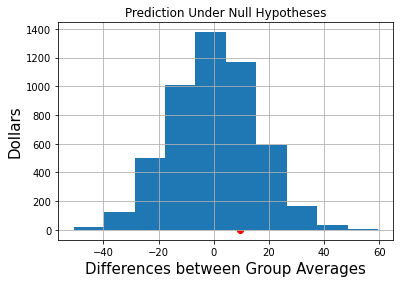

In [21]:
differences_df.hist()
plt.title('Prediction Under Null Hypotheses');
plt.xlabel('Differences between Group Averages',fontsize=15)
plt.ylabel('Dollars',fontsize=15);
plt.scatter(observed_difference,-0.005,color='red')

## The Observed diffence lies within the sample difference histogram.

In [22]:
np.count_nonzero(differences <= observed_difference)/differences.size

0.7352

## Emperical value is grater than p value is 0.05.hence Fail to reject the null hypotheisis.